## Esercizio A

Data la matrice
$$
\left[
\begin{array}{cccc}
4.5 & 1 & 3 & 2\\
1 & -8 & 2 & 1\\
-1 & -2 & -3 & -1\\
2 & 6 & 0 & 1
\end{array}
\right ],
$$

calcolarne la fattorizzazione lu di Gauss  facendo uso della funzione scipy.linalg.lu  e sfruttarla per il calcolo del suo determinante e della sua inversa.

[[ 0.5862069  -0.36206897  0.34482759 -0.46551724]
 [ 0.5862069  -0.36206897  0.34482759 -0.46551724]
 [ 0.5862069  -0.36206897  0.34482759 -0.46551724]
 [ 0.5862069  -0.36206897  0.34482759 -0.46551724]]
-58.00000000000001
57.999999999999986


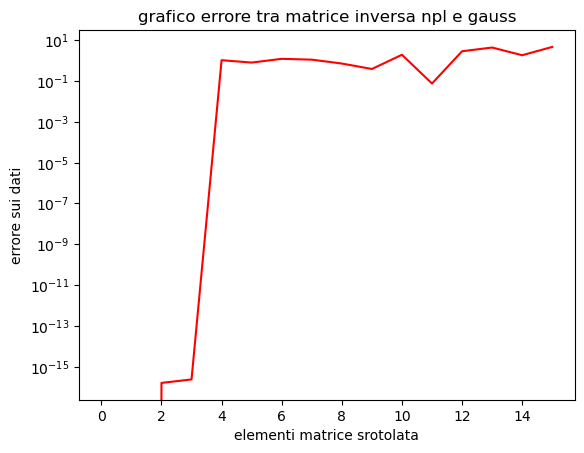

In [87]:
import scipy.linalg as spl
import numpy.linalg as npl
import numpy as np
import SolveTriangular
import matplotlib.pyplot as plt

A = np.array([[4.5,1,3,2],[1,-8,2,1],[-1,-2,-3,-1],[2,6,0,1]])
Ainv = npl.inv(A)
b = np.array([np.sum(np.abs(row)) for row in A]).reshape(4,1)
B = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

def gauss(P,L,U,b):
    y,flag = SolveTriangular.Lsolve(L,P@b)
    x,flag = SolveTriangular.Usolve(U,y)
    return  x

def solvensis(A,B):
    PT,L,U = spl.lu(A)
    P = PT.T.copy()
    X = np.zeros((4,4))
    for i in range(0, A.shape[0]):
        ris = gauss(P, L, U, B[:,i])
        A[:,i] = ris[0].ravel()
    return A, P, U

A,P,U = solvensis(A,B)
print(A)
error = np.abs(A - Ainv) / (np.abs(A) + 1e-10)

#"grafico errore tra matrice inversa npl e gauss":
plt.title("grafico errore tra matrice inversa npl e gauss")
plt.xlabel("elementi matrice srotolata")
plt.ylabel("errore sui dati")
plt.semilogy(np.arange(error.size),error.ravel(),'-r')
A = np.array([[4.5,1,3,2],[1,-8,2,1],[-1,-2,-3,-1],[2,6,0,1]])
PT,L,U = spl.lu(A)
s = 1
det = np.prod(np.diag(U)) * ((-1)**s) # s è il numero di di righe scanmbiate nella matrice di permutazione P
print(det)
print(npl.det(A))


## Esercizio  B

Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,4$ con 
$$
\begin{array}{c}
x_1=0, \quad x_2=4, \quad x_3=0, \quad x_4=5\\
y_1=0, \quad y_2=0, \quad y_3=4, \quad y_4=6.
\end{array}
$$ 
Scrivere lo script Python  in cui
- si costruisca il sistema lineare sovradeterminato ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i quattro punti assegnati, e si denotino con ${\bf A}$ e ${\bf b}$ la matrice dei coefficienti e il termine noto ottenuti;   [**punti 2**]

- si sfrutti la decomposizione QR  della matrice A  per ottenere la soluzione ${\bf a}^*$ del problema ai minimi quadrati $\min_{{\bf a} \in \mathbb{R}^3} \|{\bf A}{\bf a}-{\bf b}\|_2^2$  e  si calcoli il valore di $\|{\bf A}{\bf a}^*-{\bf b}\|_2^2$;   [**punti 5**]

-  dopo averne determinato centro e raggio, si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a^*_1x+a^*_2y+a^*_3=0$ (individuata dalla soluzione ${\bf a}^*$ del problema ai minimi quadrati) e i quattro punti assegnati dal problema.[**punti 3**]


**Nota Bene**: Si ricorda che data una circonferenza nella forma canonica
$$ x^2+y^2+a_1 x+a_2 x+a_3=0$$

le coordinate del suo centro sono 
$$C≡(-a_1/2,-a_2/2)$$

e la lunghezza del suo raggio è data da:

$$r=\sqrt{\frac{a_1^2}{4}+\frac{a_2^2}{4} -a_3}$$

e la circoferenza può essere rappresentata in forma parametrica $C(t),  t \in [0, 2 \cdot \pi]$ e le due componenti parametriche sono $$x(t)= C_0+r\cdot cos(t);$$ $$ y(t)= C_1+r\cdot sin(t)$$

a1,a2,a3:
 [[-5.61904762]
 [-5.75396825]
 [ 3.77777778]]
||Aa-b||^2:  36.6984126984127
raggio:  3.5203244062759365
centro:  [[2.80952381]
 [2.87698413]]


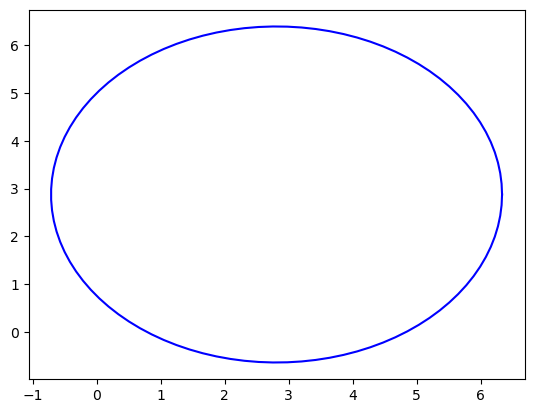

In [89]:
x = np.array([0,4,0,5])
y = np.array([0,0,4,6])

#costruisco sistema associato
A = np.array([
    [4,0,1],
    [0,4,1],
    [5,6,1],
    [0,0,1]
])
b = np.array([-16,-16,-61,0]).reshape(4,1)

#Risolvo il sistema sovradeterminato Ax = b
def qrLS(A,b):
    n=A.shape[1]
    Q,R=spl.qr(A)
    h=Q.T@b
    x,flag= SolveTriangular.Usolve(R[0:n,:],h[0:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

coeff,residuo = qrLS(A,b)
a = np.array(coeff).reshape(3,1)
print("a1,a2,a3:\n", a)
norm = (spl.norm(A@a - b))**2
print("||Aa-b||^2: ",norm)

r = np.sqrt(a[0]**2/4+a[1]**2/4-a[2])
r = r[0]
print("raggio: ",r)
c = np.array([-a[0]/2, -a[1]/2])
print("centro: ",c)


theta = np.linspace(0,2 * np.pi, 100)
x = c[0] + r*np.cos(theta)
y = c[1] + r*np.sin(theta)

plt.plot(x, y, '-b')


## Esercizio C
Per i dati $(x_i, y_i)$ riportati nei seguenti array

x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013]) 

y = np.array([0.0007,0.0162, 0.0288, 0.0309, 0.0310])

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;
- determinare l'approssimazione ai minimi quadrati espressa in termini di
basi esponenziali: $y = a + b e^{-x}+ c e^{-2x}$

Quale tra le tre approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).

# Esercizio D

La temperatura T in prossimita' del suolo varia al variare della concentrazione k dell'acido carbonico e della latitudine L. Per k=1.5 la temperatura al suolo subisce una variazione dipendente dalla temperatura secondo la seguente tabella 

L	[-55	-45	-35	-25	-15	-5	5	15	25	35	45	55	65]

T	[3.7	3.7	3.52	3.27	3.2	3.15	3.15	3.25	3.47	3.52	3.65	3.67	3.52]

Si vuole costruire un MODELLO che descriva la legge T=T(L) anche per latitudini non misurate. 
Ad esempio si vuole valutare la variazione di temperatura a Londra ( L=51°).
mediante interpolazione con un polinomio di grado 12.
Valutare e disegnare, inoltre, il polinomio interpolatore di Lagrange in un set di 100 dati equidistanti nell’intervallo min(L), max(L).
Descrivere i risultati alla luce della teoria.

## Esercizio E

-  Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare

Risolvere il sistema di equazioni non lineare 

$$
\left[
\begin{array}{c}
x_0^2+x_0x_1=10 \\
 x_1+3x_0x_1^2=57
\end{array}
\right.
$$
con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria.

- Descrivi la variante del Metodod di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili

 

**Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X_0$ nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici z = f1 (x1 ,x2 ) e z = f2(x1 , x 2 ) e 
definire come iterato iniziale un vettore $X_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) \]